## Load data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os

In [ ]:
data = [pd.read_csv(f'../data/round_2/prices_round_2_day_{i}.csv', sep=';') for i in range(-1,2)]

for i in range(1,3): 
    price_df = data[i]
    prev_df = data[i-1]
    price_df['timestamp'] = price_df['timestamp'] + prev_df['timestamp'].iloc[-1]

data0 = data[1]
data = pd.concat(data).reset_index(drop=True)

data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,2999700,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0
239996,1,2999700,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,0.0
239997,1,2999700,SQUID_INK,1880,20,NaN,NaN,NaN,NaN,1884,20,NaN,NaN,NaN,NaN,1882.0,0.0
239998,1,2999700,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


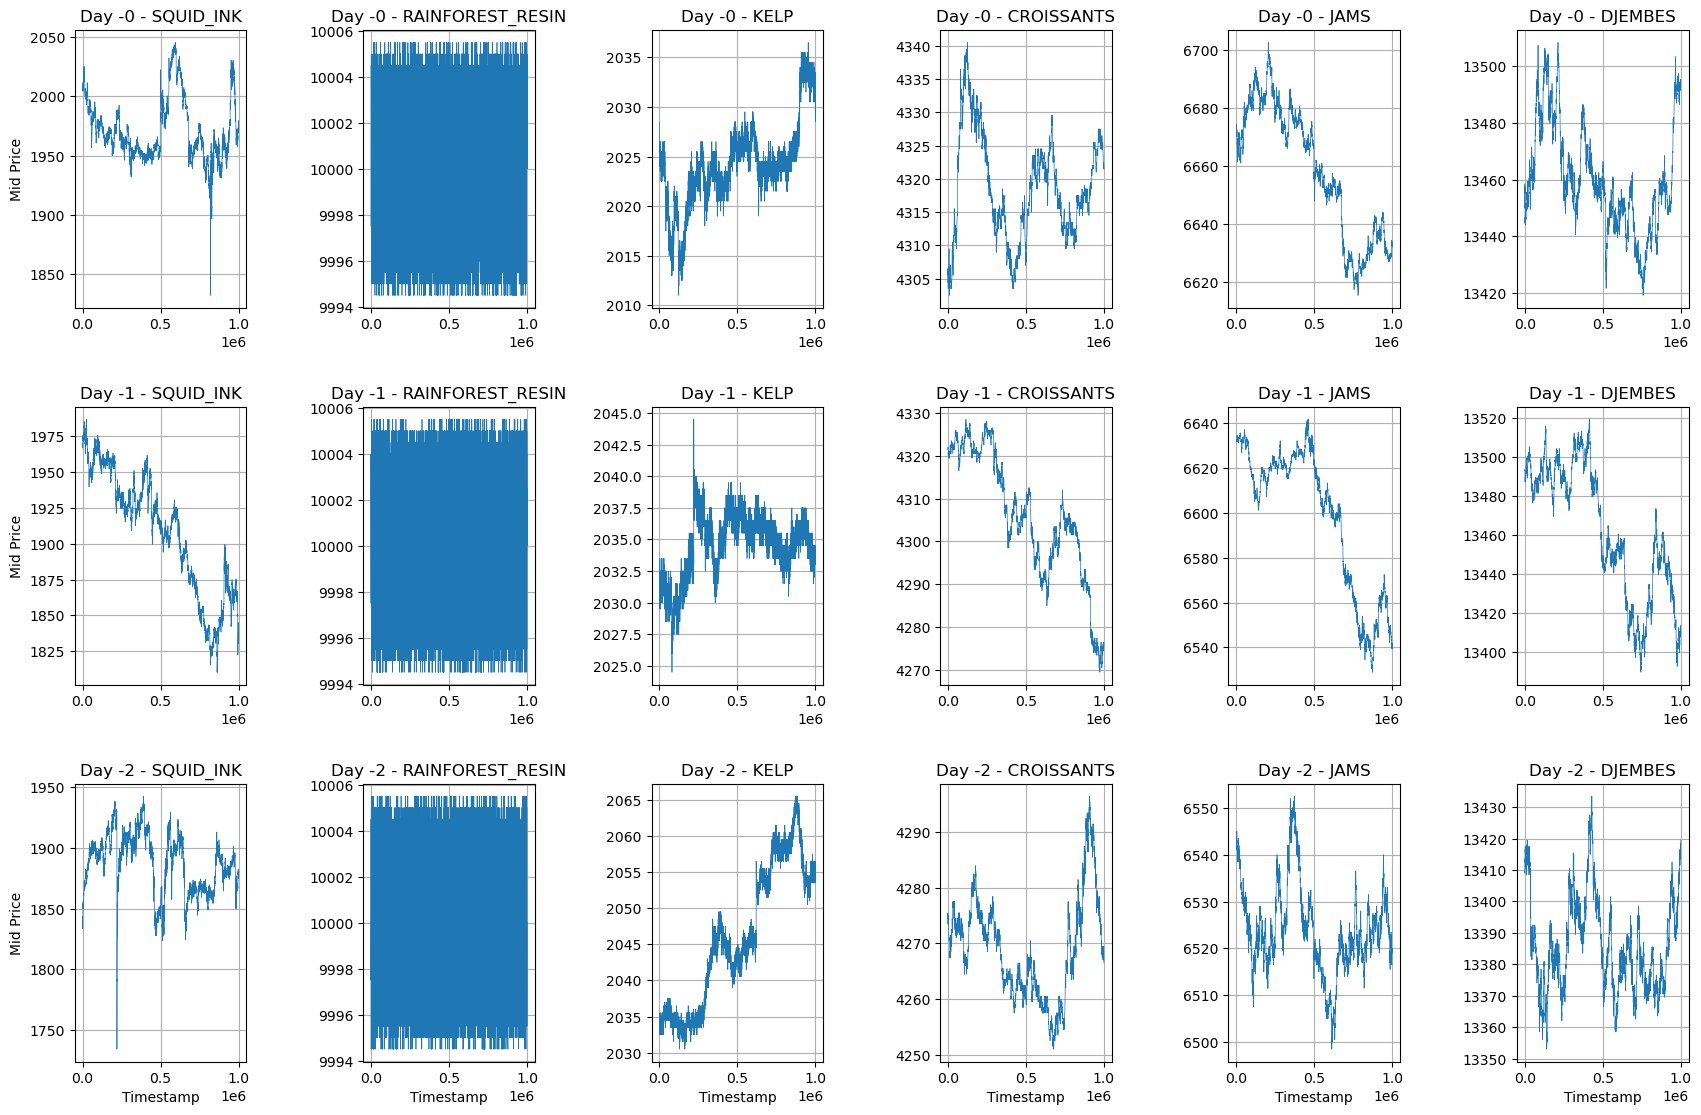

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load files
df = pd.read_csv('/Users/tommasomarrucci/Desktop/IMC BIEF 42/data/round_2/prices_round_2_day_-1.csv', sep=';')
df1 = pd.read_csv('/Users/tommasomarrucci/Desktop/IMC BIEF 42/data/round_2/prices_round_2_day_0.csv', sep=';')
df2 = pd.read_csv('/Users/tommasomarrucci/Desktop/IMC BIEF 42/data/round_2/prices_round_2_day_1.csv', sep=';')

products = ['SQUID_INK', 'RAINFOREST_RESIN', 'KELP', 'CROISSANTS', 'JAMS', 'DJEMBES']
dataframes = [df, df1, df2]

# Create a 3x3 grid for 9 mini charts
fig, axs = plt.subplots(3, 6, figsize=(18, 12))  # 3 rows, 3 columns
fig.tight_layout(pad=5.0)  # Add space between plots

# Plot
for i, data in enumerate(dataframes):           # Loop over df, df1, df2
    for j, product in enumerate(products):      # Loop over 3 products
        ax = axs[i, j]                           # Access subplot at row i, column j

        product_df = data[data['product'] == product]

        # Plot with thinner line
        ax.plot(product_df['timestamp'], product_df['mid_price'], linewidth=0.5)

        # Title per mini-chart
        ax.set_title(f'Day -{i} - {product}')
        
        # X and Y labels (optional: only on sides to make it cleaner)
        if i == 2:  # Last row
            ax.set_xlabel('Timestamp')
        if j == 0:  # First column
            ax.set_ylabel('Mid Price')

        # Special zoom for RAINFOREST_RESIN
        if product == "RAINFOREST_RESIN":
            ax.get_yaxis().get_major_formatter().set_useOffset(False)

        ax.grid(True)

# Show all 9 charts together
plt.show()

In [4]:
squid_ink = data[data['product'] == 'SQUID_INK']
rainforest_resin = data[data['product'] == 'RAINFOREST_RESIN']
croissants = data[data['product'] == 'CROISSANTS']
jams = data[data['product'] == 'JAMS']
djembes = data[data['product'] == 'DJEMBES']
etf_1 = data[data['product'] == 'PICNIC_BASKET1']
etf_2 = data[data['product'] == 'PICNIC_BASKET2']

In [5]:
syntetic_basket_1 = pd.DataFrame(
    index = etf_1.index,
    columns = etf_1.columns
)
syntetic_basket_1['day'] = etf_1['day']
syntetic_basket_1['timestamp'] = etf_1['timestamp']
syntetic_basket_1['product'] = 'SYNTETIC_BASKET_2'

In [6]:
syntetic_basket_2 = pd.DataFrame(
    index = etf_2.index,
    columns = etf_2.columns
)
syntetic_basket_2['day'] = etf_2['day']
syntetic_basket_2['timestamp'] = etf_2['timestamp']
syntetic_basket_2['product'] = 'SYNTETIC_BASKET_2'

In [7]:
syntetic_basket_1['mid_price'] = np.sum([6*croissants['mid_price'], 3*jams['mid_price'], djembes['mid_price']], axis=0)

In [8]:
syntetic_basket_2['mid_price'] = np.sum([4*croissants['mid_price'], 2*jams['mid_price']], axis=0)

<Axes: xlabel='timestamp', ylabel='mid_price'>

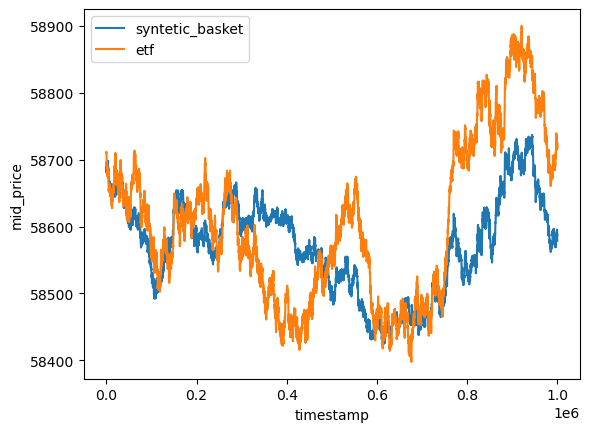

In [9]:
from cProfile import label


sns.lineplot(data=syntetic_basket_1, x='timestamp', y='mid_price', label='syntetic_basket')
sns.lineplot(data=etf_1, x='timestamp', y='mid_price', label='etf')

<Axes: xlabel='timestamp', ylabel='mid_price'>

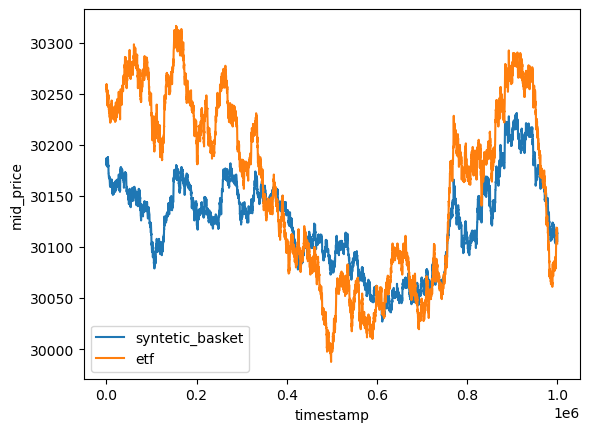

In [12]:
from cProfile import label


sns.lineplot(data=syntetic_basket_2, x='timestamp', y='mid_price', label='syntetic_basket')
sns.lineplot(data=etf_2, x='timestamp', y='mid_price', label='etf')